### Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.


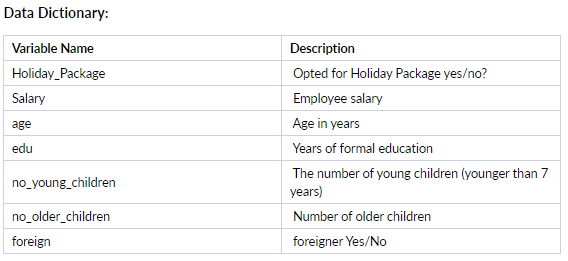

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats import zscore 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import statsmodels.api as sm


### Question 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 2.1:
    
### Performing Basic Data Exploration:
In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

- Head of the dataset
- Shape of the dataset
- Info of the dataset
- Summary of the dataset

**We will  be loading the given Data file using pandas.**
    


In [2]:
df=pd.read_csv('Holiday_Package.csv')

In [3]:
df.head(20)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
5,6,yes,61590,42,12,0,1,no
6,7,no,94344,51,8,0,0,no
7,8,yes,35987,32,8,0,2,no
8,9,no,41140,39,12,0,0,no
9,10,no,35826,43,11,0,2,no


**Head function will tell the top records in the data set. By default python shows you only top 5 records.**

#### Dropping the 'Unnamed' column as it is not usefull for the model.

In [4]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [5]:
print('The number of rows of the dataframe is',df.shape[0],'.')

print('The number of columns of the dataframe is',df.shape[1],'.')

The number of rows of the dataframe is 872 .
The number of columns of the dataframe is 7 .


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


**info() is being used to check the Information about the data and the data types of each respective attributes.**

**The following are the observation:**
- Total of 7 variables
- All are 5 numeric variables


In [7]:
df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

#### There are no missing value in the dataset.

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,47729.2,23418.7,1322,35324,41903.5,53469.5,236961
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### It is observed that minimum value of age is 20.

### Checking for any kind of special values like " ? ", any string Or  any negative number etc. in the variables

In [9]:
for column in df.columns:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


SALARY :  864
53846    1
51077    1
36800    1
36855    1
67573    1
        ..
44280    2
40270    2
46195    2
33357    2
39460    2
Name: Salary, Length: 864, dtype: int64


AGE :  43
62     3
61     8
20     8
22     9
60    10
53    10
23    11
21    12
52    13
59    14
54    14
58    16
24    16
55    17
25    17
57    18
56    18
30    19
29    19
27    19
48    20
37    21
43    21
50    21
51    22
45    23
49    23
42    24
46    24
26    24
39    25
47    26
41    26
32    27
36    28
38    28
40    29
28    29
33    30
35    31
34    32
31    32
44    35
Name: age, dtype: int64


EDUC :  20
1       1
21      1
18      1
19      2
17      3
2       6
16     10
3      11
15     15
6      21
14     25
7      31
13     43
4      50
5      67
10     90
11    100
9     114
12    124
8     157
Name: educ, dtype: int64


NO_YOUNG_CHILDREN :  4
3      5
2     55
1    147
0    665
Name: no_young_child

#### There is no special character or -ve value in the variables.

### Checking for duplicate data :

In [10]:
dups = df.duplicated()
print("No. of duplicate rows in our data",dups.sum())
df[dups]

No. of duplicate rows in our data 0


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


#### It shows that there is no duplicate data. 

## Uni-variate analysis

### Numerical variables

C:\Users\91789\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


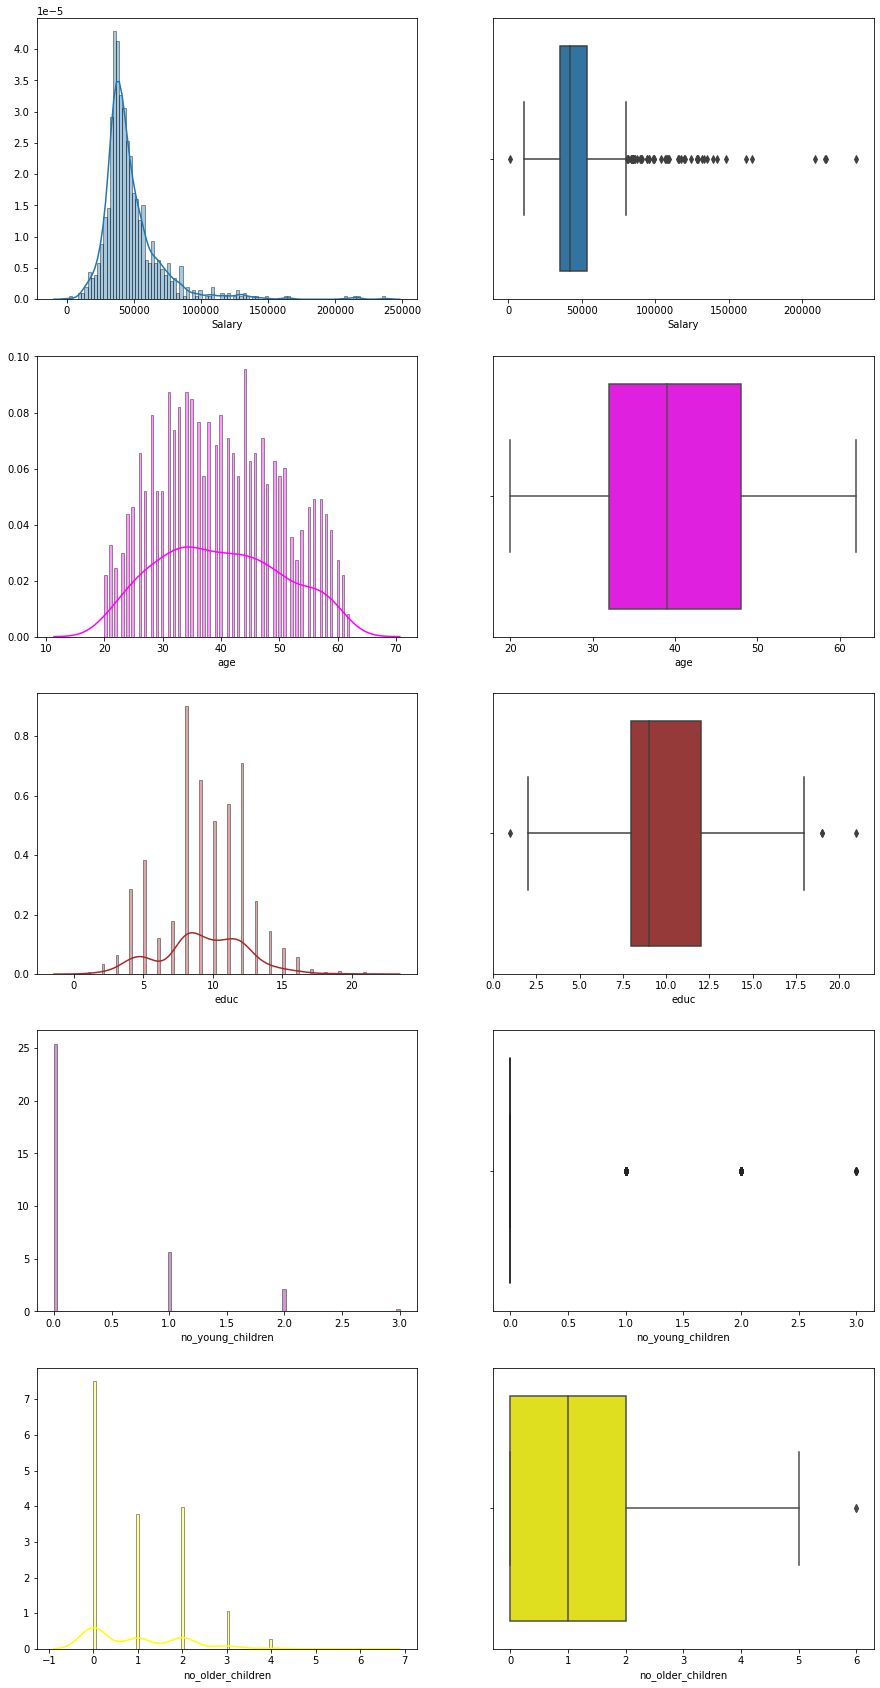

In [11]:
fig, axs=plt.subplots(nrows= 5, ncols= 2, figsize=(15,30))
sns.distplot(df['Salary'], bins= 100, hist_kws=dict(ec='black'), ax=axs[0][0])
sns.distplot(df['age'], bins= 100, hist_kws=dict(ec='black'), ax=axs[1][0], color='magenta')
sns.distplot(df['educ'], bins= 100, hist_kws=dict(ec='black'), ax=axs[2][0], color='brown')
sns.distplot(df['no_young_children'], bins= 100, hist_kws=dict(ec='black'), ax=axs[3][0], color='purple')
sns.distplot(df['no_older_children'], bins= 100, hist_kws=dict(ec='black'), ax=axs[4][0], color='yellow')
sns.boxplot(df['Salary'], ax=axs[0][1])
sns.boxplot(df['age'], ax=axs[1][1], color='magenta')
sns.boxplot(df['educ'], ax=axs[2][1], color='brown')
sns.boxplot(df['no_young_children'], ax=axs[3][1], color='purple')
sns.boxplot(df['no_older_children'], ax=axs[4][1], color='yellow')

plt.show()

#### There are  outliers in the all the variables except "age". The variable "age" has near normal distribution. Others are skewed or multimodal distribution.



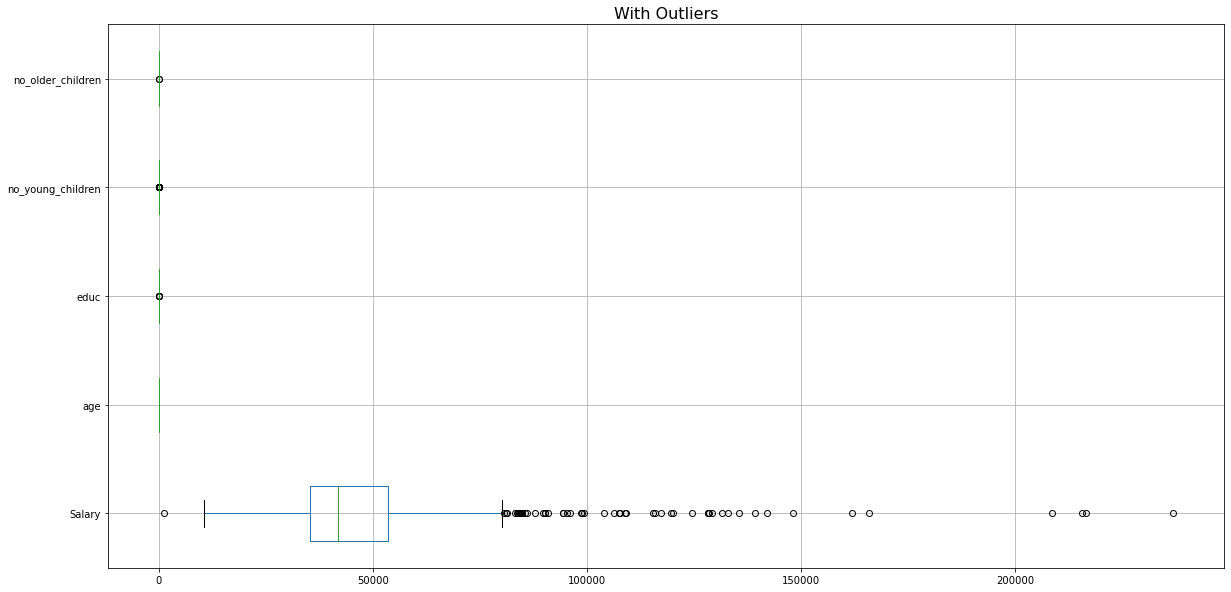

In [12]:
OUTLIER=df.dtypes[(df.dtypes!='object') & (df.dtypes!='bool')].index
plt.figure(figsize=(20,10))
df[OUTLIER].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

#### Though there are outliers, from the glimpse of the data, it shows that the data are not wrong or stray, so, we will keep the data for further analysis. 

### Categorical variables

In [13]:
df.Holliday_Package.value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [14]:
df.foreign.value_counts()

no     656
yes    216
Name: foreign, dtype: int64

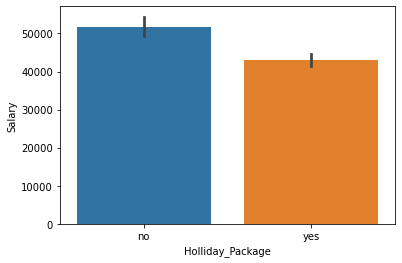

In [15]:
sns.barplot(x ='Holliday_Package',y ='Salary',data= df)

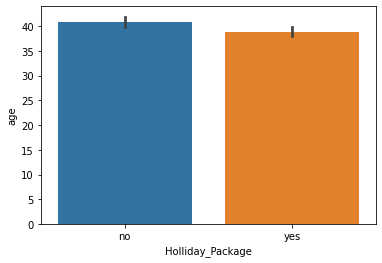

In [16]:
sns.barplot(x ='Holliday_Package',y ='age',data= df)

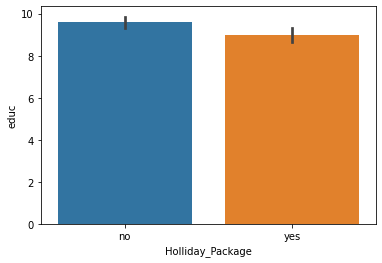

In [17]:
sns.barplot(x ='Holliday_Package',y ='educ',data= df)

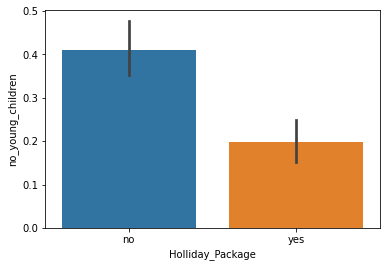

In [18]:
sns.barplot(x ='Holliday_Package',y ='no_young_children',data= df)

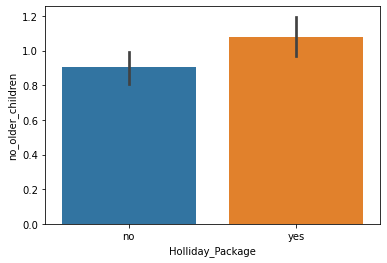

In [19]:
sns.barplot(x ='Holliday_Package',y ='no_older_children',data= df)

#### Insights from categorical variables which are influencing target variable 'Holiday Package'

1. When the salary package is high, employees are not opting for holiday package. Reason may be individual with high salary need more personalized package rather than a generic package.

2. Age does not have much impact on opting for holiday package as both the target classes have similar ages.

3. Education does not have much impact on opting for holiday package as both the target classes have similar education duration.

3. Employees having more young children are not opting for package.

4. Employees having more older children are going for holiday, may be related to educational trip for older children or other reasons.



## Bi-variate Analysis

### Data Distribution

C:\Users\91789\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


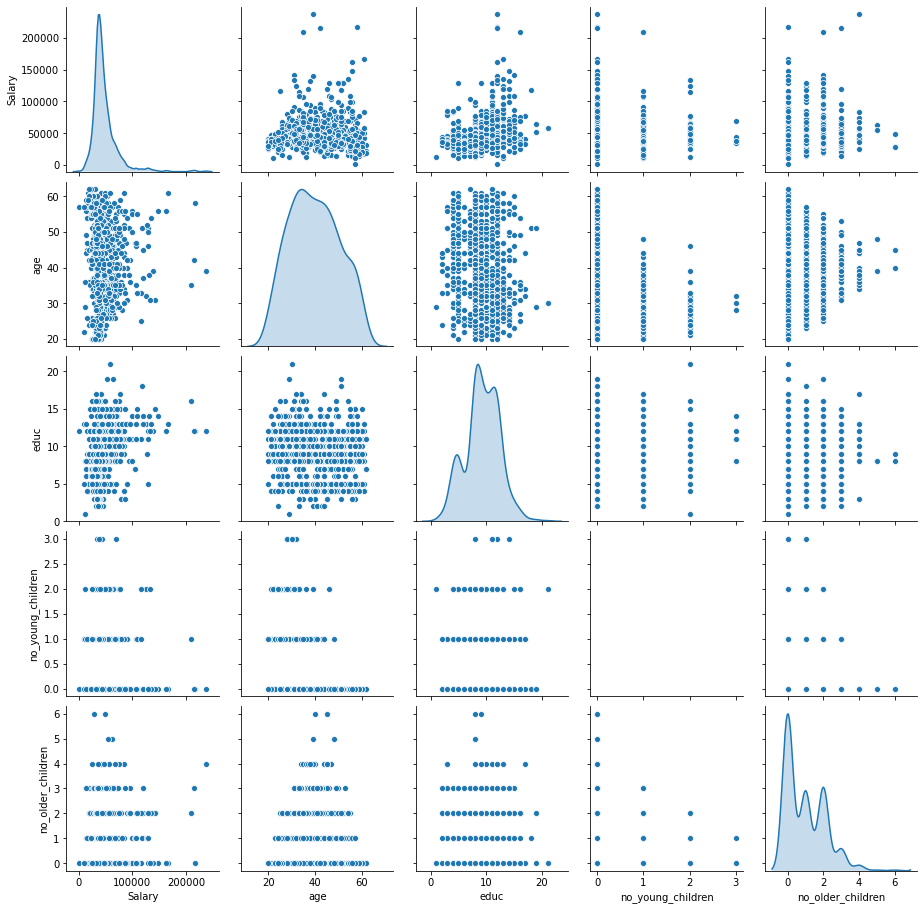

In [20]:
df_pair = (df[OUTLIER])
sns.pairplot(df_pair, diag_kind='kde')  
plt.show()

### Correlation between columns

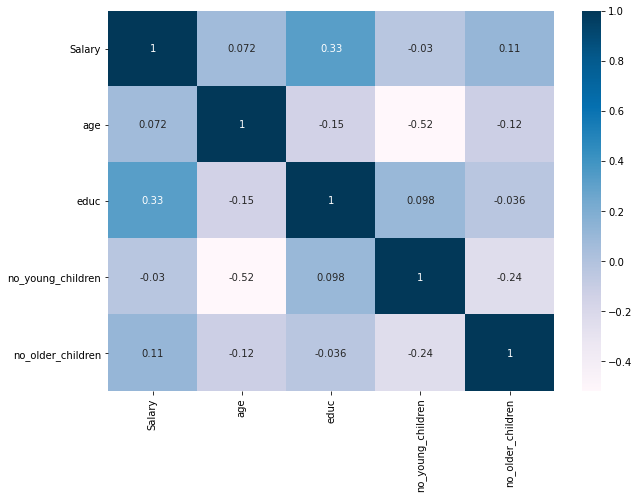

In [21]:
plt.figure(figsize=(10,7))
corr_data = df[OUTLIER].corr()
sns.heatmap(corr_data,annot=True,cmap='PuBu');

### Insights from corelation study

#### Age and no. of young children have moderate negative corelation. Also, Salary and Education are moderately corelated.

### Observations/Inferences:

The following are the observation from basic descriptive stats:

1. There are total of 7 variables out of which 5 are  numeric.

2. All the data distributions are either slightly skewed or bimodal except the variable "age" which has near normal distribution.

3. There are outliers in the dataset. But it is decided not to treat the outliers.

4. There is no duplicate row in the dataset.

5. There was no missing value in the dataset.

6. Age and no. of young children have moderate negative corelation. Also, Salary and Education are moderately corelated.

7. Variables "Age" and "Edu" do not have much influence on target variable 'Holiday Package'.


### Question 2.2) Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 2.2:

### Encoding the categorical features

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [23]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes 

In [24]:
df

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0
...,...,...,...,...,...,...,...
867,0,40030,24,4,2,1,1
868,1,32137,48,8,0,0,1
869,0,25178,24,6,2,0,1
870,1,55958,41,10,0,1,1


### It is asked not to scale the data.

### Splitting data into training and test set

In [25]:
# Copy all the predictor variables into X dataframe
X = df.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = df[['Holliday_Package']]

#### We will split the dataset into 70% training data and 30% of testing data and use random state of 5.

In [26]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.30, random_state = 5)

#### Checking the dimensions of the training and test data

In [27]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (610, 6)
X_test (262, 6)
y_train (610, 1)
y_test (262, 1)


#### =======================================================================================
### Instantiating the Logistic Regression Model
#### =======================================================================================

In [28]:
# invoke the LogisticRegression function and find the bestfit model on training data

model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(X_train, y_train)
y_predict = model_logistic.predict(X_test)

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Checking the score of the model

In [29]:
model_logistic.score(X_train, y_train)

0.5426229508196722

#### It is observed that the model score is low. We will try to improve the model score by tuning the hyper parameters.

### Instantiating a new model

In [30]:
model_logistic_2= LogisticRegression(solver='liblinear',penalty='l1',max_iter=1000,n_jobs=-1)
model_logistic_2.fit(X_train, y_train)

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='l1', solver='liblinear')

In [31]:
model_logistic_2.score(X_train, y_train)

0.6852459016393443

#### It is observed that the model score has improved significantly. So, we will use GridSearchCV to find the best hyper parameter combinations.

### Applying GridSearchCV for Logistic Regression

In [32]:
param_grid_LOG = {
    "solver":['newton-cg','saga','lbfgs'],
    "penalty":['l1','l2'], 
    "max_iter":[500,1000],
    "n_jobs":[1,2], 
}

model_logistic_3 = LogisticRegression(random_state=5)

grid_search_LOG = GridSearchCV(estimator = model_logistic_3, param_grid = param_grid_LOG, cv = 10, scoring="accuracy")

In [33]:
grid_search_LOG.fit(X_train,y_train)

C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validati

C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

C:\Users\91789\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\valid

C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search alg

C:\Users\91789\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports o

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91789\anaconda3\lib\site

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=5),
             param_grid={'max_iter': [500, 1000], 'n_jobs': [1, 2],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'saga', 'lbfgs']},
             scoring='accuracy')

In [34]:
grid_search_LOG.best_params_

{'max_iter': 500, 'n_jobs': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [35]:
grid_search_LOG.best_estimator_

LogisticRegression(max_iter=500, n_jobs=1, random_state=5, solver='newton-cg')

In [36]:
bestmodel_LOG=grid_search_LOG.best_estimator_

In [37]:
y_train_predict_LOG = bestmodel_LOG.predict(X_train)
y_test_predict_LOG = bestmodel_LOG.predict(X_test)

In [38]:
bestmodel_LOG.score(X_train,y_train)

0.680327868852459

In [39]:
bestmodel_LOG.score(X_test,y_test)

0.648854961832061

### Checking the coeffecients

In [40]:
bestmodel_LOG.coef_

array([[-1.91959934e-05, -4.43137576e-02,  3.61539648e-02,
        -1.43893198e+00, -1.16573705e-01,  1.49419942e+00]])

### Because of the logit function, logistic regression coefficients represent the "log odds" that an observation is in the target class (“1”) given the values of its X variables. Thus, these log odd coefficients need to be converted to regular ODDs in order to make sense of them.

### We can do this with np.exp().

In [41]:
odds = np.exp(bestmodel_LOG.coef_[0])
pd.DataFrame(odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
foreign,4.455768
educ,1.036815
Salary,0.999981
age,0.956654
no_older_children,0.889965
no_young_children,0.237181


### So, we have seen that 'foreign' has the biggest ODD coeffecients followed by 'educ' , ' Salary' and so on...

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">

### To interpret this, we can say - As variable 'foreign' increases by one unit, the odds that the "holiday package" represented in the observation are in the target class (“1”) are over 4.45x as large as the odds that they won’t be in the target class.

### Similarly, As variable 'educ' increases by one unit, the odds that the "holiday package" represented in the observation are in the target class (“1”) are over 1x as large as the odds that they won’t be in the target class.

### For ODDs less than 1 (our negative log (ODDs) coefficients), we can take 1/odds to make even better sense of them. So as 'Salary" increases by 1, the odds that the ''salary package" is NOT in the target class are 1/0.999 or 1x (same) as likely as the odds that IT IS in the target class.

### Some TRIAL - IGNORE

logit_Inc=sm.Logit(y_train,X_train)
results=logit_Inc.fit()
print(results.summary())


 np.exp(results.params)

### Performance parameters

In [42]:
# Training data confusion matrix  

print("Confusion matrix for Training data \n", confusion_matrix(y_train, y_train_predict_LOG))

# Testing data confusion matrix  

print ('\n')

print("Confusion matrix for Testing data \n", confusion_matrix(y_test, y_test_predict_LOG))

# Training Data Accuracy 

print ('\n')

print("Accuracy for Training Data \n", bestmodel_LOG.score(X_train,y_train))


# TESTING Data Accuracy 

print ('\n')

print("Accuracy for Testing Data \n", bestmodel_LOG.score(X_test,y_test))


print ('\n')

print ("Classification report for Training data")
print(classification_report(y_train, y_train_predict_LOG))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, y_test_predict_LOG))

Confusion matrix for Training data 
 [[276  62]
 [133 139]]


Confusion matrix for Testing data 
 [[102  31]
 [ 61  68]]


Accuracy for Training Data 
 0.680327868852459


Accuracy for Testing Data 
 0.648854961832061


Classification report for Training data
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       338
           1       0.69      0.51      0.59       272

    accuracy                           0.68       610
   macro avg       0.68      0.66      0.66       610
weighted avg       0.68      0.68      0.67       610



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.63      0.77      0.69       133
           1       0.69      0.53      0.60       129

    accuracy                           0.65       262
   macro avg       0.66      0.65      0.64       262
weighted avg       0.66      0.65      0.64       262



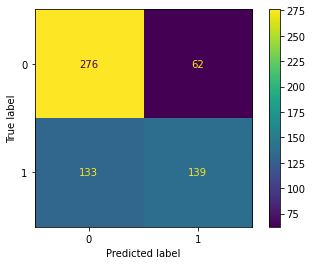

In [43]:
plot_confusion_matrix(bestmodel_LOG,X_train,y_train)

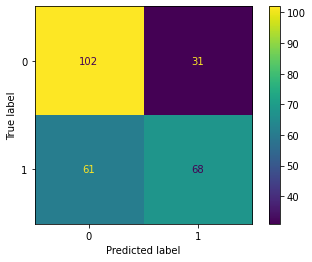

In [44]:
plot_confusion_matrix(bestmodel_LOG,X_test,y_test)

### Logistic Regression - AUC and ROC for the Training data

Area under Curve (AUC) is: 0.749


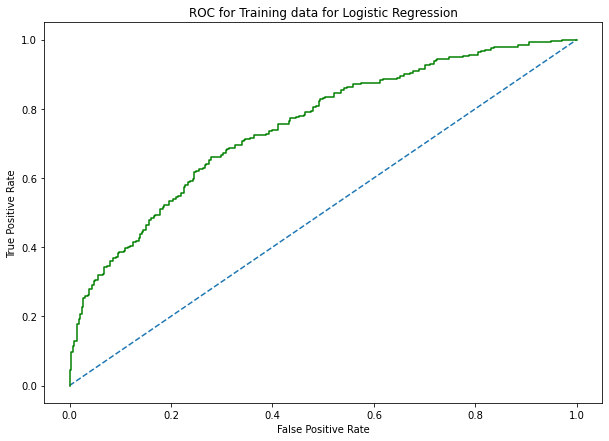

In [45]:
plt.figure(figsize=(10,7))
probs_LOG = bestmodel_LOG.predict_proba(X_train)
probs_LOG = probs_LOG[:, 1]
# calculate AUC
LOG_train_auc = roc_auc_score(y_train, probs_LOG)
print('Area under Curve (AUC) is: %.3f' % LOG_train_auc)
# calculate roc curve
LOG_train_fpr, LOG_train_tpr, LOG_train_thresholds = roc_curve(y_train, probs_LOG)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(LOG_train_fpr, LOG_train_tpr,color='green')
plt.title('ROC for Training data for Logistic Regression')
plt.show()

### Logistic Regression - AUC and ROC for the Testing data

Area under Curve (AUC) is: 0.691


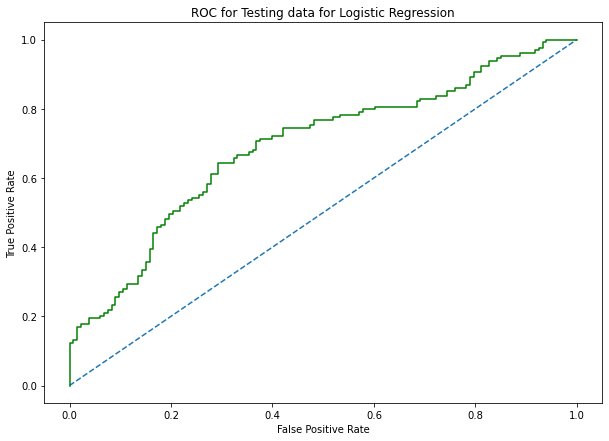

In [46]:
plt.figure(figsize=(10,7))
probs_LOG_t = bestmodel_LOG.predict_proba(X_test)
probs_LOG_t = probs_LOG_t[:, 1]
# calculate AUC
LOG_train_auc = roc_auc_score(y_test, probs_LOG_t)
print('Area under Curve (AUC) is: %.3f' % LOG_train_auc)
# calculate roc curve
LOG_train_fpr, LOG_train_tpr, LOG_train_thresholds = roc_curve(y_test, probs_LOG_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(LOG_train_fpr, LOG_train_tpr,color='green')
plt.title('ROC for Testing data for Logistic Regression')
plt.show()

### So, we have seen the best optimized score for both training and test set based on adjustments to the parameters in the Logistic Regression Class.

#### =======================================================================================
### Instantiating the Linear Discriminant Analysis Model
#### =======================================================================================

In [47]:
LDA = LinearDiscriminantAnalysis()
model_LDA=LDA.fit(X_train,y_train)
model_LDA

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis()

In [48]:
param_grid_LDA = {
    "solver":['svd', 'lsqr', 'eigen'],
    "shrinkage":[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1], 
    #"priors":[0.5,.3,.6],
    "tol":[1e-4,1e-3,1e-5]
}

model_LDA_2 = LinearDiscriminantAnalysis()

grid_search_LDA = GridSearchCV(estimator = model_LDA_2, param_grid = param_grid_LDA, cv = 10, scoring="accuracy")

In [49]:
grid_search_LDA.fit(X_train,y_train)

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91789\anaconda3\lib\site-packages\sklearn\

C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91789\anaconda3\lib\site-packages\sklearn\

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\

C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91789\anaconda3\lib\site-packages\sklearn\

C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\

C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91789\anaconda3\lib\site-packages\sklearn\

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91789\anaconda3\lib\site-packages\sklearn\

C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91789\anaconda3\lib\site-packages\sklearn\

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91789\anaconda3\lib\site-packages\sklearn\

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91789\anaconda3\lib\site-packages\sklearn\

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91789\anaconda3\lib\site-packages\sklearn\

C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91789\anaconda3\lib\site-packages\sklearn\

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                       0.8, 0.9, 1],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001, 1e-05]},
             scoring='accuracy')

In [50]:
grid_search_LDA.best_params_

{'shrinkage': 0, 'solver': 'lsqr', 'tol': 0.0001}

In [51]:
bestmodel_LDA=grid_search_LDA.best_estimator_

In [52]:
bestmodel_LDA.score(X_train,y_train)

0.6737704918032786

In [53]:
bestmodel_LDA.score(X_test,y_test)

0.6374045801526718

In [54]:
pred_class_train=bestmodel_LDA.predict(X_train)
pred_class_test=bestmodel_LDA.predict(X_test)
pred_prob_train=bestmodel_LDA.predict_proba(X_train)
pred_prob_train

array([[0.33534995, 0.66465005],
       [0.65999595, 0.34000405],
       [0.15146339, 0.84853661],
       ...,
       [0.19112589, 0.80887411],
       [0.76643986, 0.23356014],
       [0.6836852 , 0.3163148 ]])

In [55]:
pred_prob_test=bestmodel_LDA.predict_proba(X_test)
pred_prob_test

array([[0.54367395, 0.45632605],
       [0.65164661, 0.34835339],
       [0.57330651, 0.42669349],
       [0.41445312, 0.58554688],
       [0.74793953, 0.25206047],
       [0.21501029, 0.78498971],
       [0.23863739, 0.76136261],
       [0.62330814, 0.37669186],
       [0.62912679, 0.37087321],
       [0.62375087, 0.37624913],
       [0.38756234, 0.61243766],
       [0.6170603 , 0.3829397 ],
       [0.19849603, 0.80150397],
       [0.68112652, 0.31887348],
       [0.49771284, 0.50228716],
       [0.49674136, 0.50325864],
       [0.22816281, 0.77183719],
       [0.659439  , 0.340561  ],
       [0.32778503, 0.67221497],
       [0.27665607, 0.72334393],
       [0.92840452, 0.07159548],
       [0.3334449 , 0.6665551 ],
       [0.84140684, 0.15859316],
       [0.58088179, 0.41911821],
       [0.95310262, 0.04689738],
       [0.55226555, 0.44773445],
       [0.125831  , 0.874169  ],
       [0.39294646, 0.60705354],
       [0.65902919, 0.34097081],
       [0.39250718, 0.60749282],
       [0.

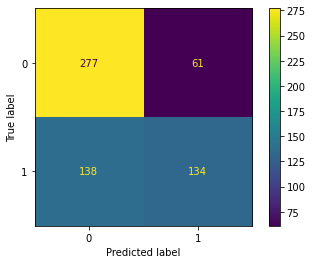

In [56]:
plot_confusion_matrix(bestmodel_LDA,X_train,y_train)

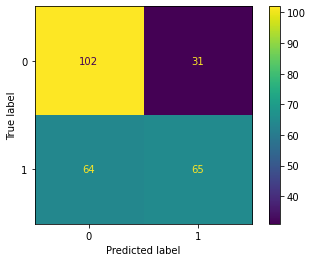

In [57]:
plot_confusion_matrix(bestmodel_LDA,X_test,y_test)

### Checking the coeffecients

In [58]:
imp=bestmodel_LDA.coef_[0]
imp

array([-1.50953518e-05, -4.74980945e-02,  4.07595354e-02, -1.44405796e+00,
       -1.27358095e-01,  1.69337255e+00])

In [59]:
pd.DataFrame(imp, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
foreign,1.693373
educ,0.040760
Salary,-0.000015
age,-0.047498
no_older_children,-0.127358
no_young_children,-1.444058


<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">

### The coefficients generated for independent variables (IVs) in a LDA are simply weights that help to create a single score (linear composite) that maximally separates group means. So, in our case 'foreign' followed by 'educ' has the highest co-effecients which means that they are likely to be well separated. 'Salary' is on the border line.

In [60]:
bestmodel_LDA.intercept_

array([2.13252484])

In [61]:
# Training data confusion matrix  

print("Confusion matrix for Training data \n", confusion_matrix(y_train, pred_class_train))

# Testing data confusion matrix  

print ('\n')

print("Confusion matrix for Testing data \n", confusion_matrix(y_test, pred_class_test))

# Training Data Accuracy 

print ('\n')

print("Accuracy for Training Data \n", bestmodel_LDA.score(X_train,y_train))


# TESTING Data Accuracy 

print ('\n')

print("Accuracy for Testing Data \n", bestmodel_LDA.score(X_test,y_test))


print ('\n')

print ("Classification report for Training data")
print(classification_report(y_train, pred_class_train))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, pred_class_test))

Confusion matrix for Training data 
 [[277  61]
 [138 134]]


Confusion matrix for Testing data 
 [[102  31]
 [ 64  65]]


Accuracy for Training Data 
 0.6737704918032786


Accuracy for Testing Data 
 0.6374045801526718


Classification report for Training data
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       338
           1       0.69      0.49      0.57       272

    accuracy                           0.67       610
   macro avg       0.68      0.66      0.65       610
weighted avg       0.68      0.67      0.66       610



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.61      0.77      0.68       133
           1       0.68      0.50      0.58       129

    accuracy                           0.64       262
   macro avg       0.65      0.64      0.63       262
weighted avg       0.65      0.64      0.63       262



###  Linear Discriminant Analysis - AUC and ROC for the Training data

Area under Curve (AUC) is: 0.750


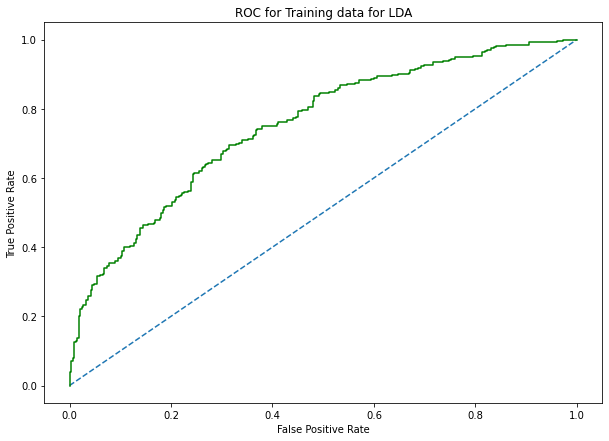

In [62]:
plt.figure(figsize=(10,7))
probs_LDA = bestmodel_LDA.predict_proba(X_train)
probs_LDA = probs_LDA[:, 1]
# calculate AUC
LDA_train_auc = roc_auc_score(y_train, probs_LDA)
print('Area under Curve (AUC) is: %.3f' % LDA_train_auc)
# calculate roc curve
LDA_train_fpr, LDA_train_tpr, LDA_train_thresholds = roc_curve(y_train, probs_LDA)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(LDA_train_fpr, LDA_train_tpr,color='green')
plt.title('ROC for Training data for LDA')
plt.show()

###  Linear Discriminant Analysis - AUC and ROC for the Testing data

Area under Curve (AUC) is: 0.692


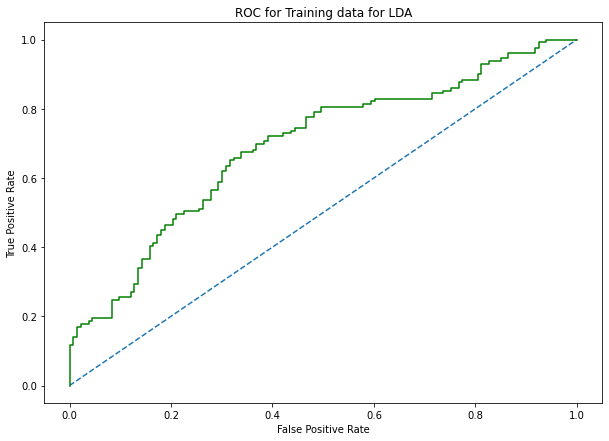

In [63]:
plt.figure(figsize=(10,7))
probs_LDA_t = bestmodel_LDA.predict_proba(X_test)
probs_LDA_t = probs_LDA_t[:, 1]
# calculate AUC
LDA_test_auc = roc_auc_score(y_test, probs_LDA_t)
print('Area under Curve (AUC) is: %.3f' % LDA_test_auc)
# calculate roc curve
LDA_test_fpr, LDA_test_tpr, LDA_test_thresholds = roc_curve(y_test, probs_LDA_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(LDA_test_fpr, LDA_test_tpr,color='green')
plt.title('ROC for Training data for LDA')
plt.show()

### Question 2.3) Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 2.3:

### Please refer to the section above..

In [64]:
index=  ['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
table = pd.DataFrame({'LOG_Reg Train data':            [0.68,0.749,0.51,0.69,0.59],
        'LDA Train data':[0.673,0.75,0.49,0.69,0.57],
        'LOG_Reg Test data':                           [0.648,0.691,0.53,0.69,0.60],
        'LDA Test data':[0.637,0.692,0.50,0.68,0.58],
        },index=index)
round(table,2)

,LOG_Reg Train data,LDA Train data,LOG_Reg Test data,LDA Test data
Accuracy,0.68,0.67,0.65,0.64
AUC,0.75,0.75,0.69,0.69
Recall,0.51,0.49,0.53,0.50
Precision,0.69,0.69,0.69,0.68
F1 Score,0.59,0.57,0.60,0.58


### While the model results between training and test sets are similar, indicating no under or overfitting issues, overall prediction of both the models are weaker in terms of prediction.

### So, it is observed that the most of performance parameters for logistic regression is better than that of Linear discriminant analysis (i.e, Accuracy, Recall and F1) for both train amd test set. AUC and Precision are similar for both train and test set for Logistic and LDA. So, we can say that Logistic regression has slightly better overall model performance when compared in absolute terms.

======================================================================================================================

### Question 2.4) Inference: Basis on these predictions, what are the insights and recommendations.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 2.4:

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">

First of all, from the observations, it is obvious that there is imbalance in dataset which causes a low recall for prediction of 1s for both train and test datasets. Therefore, it is recommended to collect more data related to the holiday package.

Some of the observations along with insights and recommendations have been documented below,

1. 'Foreign' and 'educ' have the highest importance followed by 'salary' as demonstrated by both the models. Though basic EDA shows that Education do not have much impact on opting for holiday package, from the final predictive models it is evident that actually it is impactful. 

2. 'no_older_children' and 'no_young_children. and 'age' donot have much impact on the prediction. So, instead of these attributes, company can focus on some other variables for predicting whether employees will opt for package or not. Such variables can be preferred place of destination / preferred travel season / maximum discount offered /whether spouse is employed etc. So, data collection and analysis can be done in near future for these recommended features. 

3. As 'Foreign' and 'edu' are most important features, company can plan and promote different kinds of packages. E.g, planned tour to employees' almamater, adventure tourism packages to Foreign employees etc.

4. Having said all those recommendation, it is always advisable for the company to devise and plan more marketing strategy to sell hoilday package among employees.














